In [96]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy import stats

In [97]:
import seaborn as sns
sns.set_theme(style="whitegrid")


In [98]:


errors_t1x = {
    "Type": [
        "Autograd-based", "Autograd-based", "Autograd-based", "Autograd-based",
        "Direct-force", "Direct-force", "Direct-force", "Direct-force"
    ],
    "Model": [
        "AlphaNet (E-F)", "AlphaNet (E-F-H)", "LEFTNet (E-F)", "LEFTNet (E-F-H)",
        "LEFTNet-df (E-F)", "LEFTNet-df (E-F-H)", "EquiformerV2 (E-F)", "EquiformerV2 (E-F-H)"
    ],
    "Energy (eV)": [
        "0.044(0.028)", "0.034(0.013)", "0.047(0.033)", "0.035(0.017)",
        "0.054(0.033)", "0.050(0.027)", "0.045(0.026)", "0.019(0.011)"
    ],
    "Force (eV/Å)": [
        "0.040(0.026)", "0.040(0.026)", "0.037(0.025)", "0.036(0.025)",
        "0.029(0.019)", "0.044(0.030)", "0.021(0.014)", "0.016(0.010)"
    ],
    "Hessian (eV/Å²)": [
        "0.433(0.344)", "0.303(0.215)", "0.366(0.302)", "0.151(0.107)",
        "1.648(1.503)", "0.197(0.143)", "2.231(2.071)", "0.075(0.047)"
    ],
    "Eigenvalues (eV/Å²)": [
        "0.038(0.030)", "0.024(0.016)", "0.032(0.026)", "0.007(0.004)",
        "0.128(0.125)", "0.007(0.004)", "0.214(0.218)", "0.003(0.001)"
    ]
}

# Creating a DataFrame
df_t1x = pd.DataFrame(errors_t1x)

# Add train type column
df_t1x['Train Type'] = df_t1x['Model'].str.extract(r'\((E-F-H|E-F)\)')

df_t1x




,Type,Model,Energy (eV),Force (eV/Å),Hessian (eV/Å²),Eigenvalues (eV/Å²),Train Type
0,Autograd-based,AlphaNet (E-F),0.044(0.028),0.040(0.026),0.433(0.344),0.038(0.030),E-F
1,Autograd-based,AlphaNet (E-F-H),0.034(0.013),0.040(0.026),0.303(0.215),0.024(0.016),E-F-H
2,Autograd-based,LEFTNet (E-F),0.047(0.033),0.037(0.025),0.366(0.302),0.032(0.026),E-F
3,Autograd-based,LEFTNet (E-F-H),0.035(0.017),0.036(0.025),0.151(0.107),0.007(0.004),E-F-H
4,Direct-force,LEFTNet-df (E-F),0.054(0.033),0.029(0.019),1.648(1.503),0.128(0.125),E-F
5,Direct-force,LEFTNet-df (E-F-H),0.050(0.027),0.044(0.030),0.197(0.143),0.007(0.004),E-F-H
6,Direct-force,EquiformerV2 (E-F),0.045(0.026),0.021(0.014),2.231(2.071),0.214(0.218),E-F
7,Direct-force,EquiformerV2 (E-F-H),0.019(0.011),0.016(0.010),0.075(0.047),0.003(0.001),E-F-H


In [99]:
errors_rgd1 = {
    "Type": [
        "Autograd-based", "Autograd-based", "Autograd-based", "Autograd-based",
        "Direct-force", "Direct-force", "Direct-force", "Direct-force"
    ],
    "Model": [
        "AlphaNet (E-F)", "AlphaNet (E-F-H)", "LEFTNet (E-F)", "LEFTNet (E-F-H)",
        "LEFTNet-df (E-F)", "LEFTNet-df (E-F-H)", "EquiformerV2 (E-F)", "EquiformerV2 (E-F-H)"
    ],
    "Energy (eV)": [
        "0.257(0.182)", "0.259(0.184)", "0.242(0.174)", "0.226(0.159)",
        "0.322(0.244)", "0.304(0.224)", "0.243(0.171)", "0.133(0.089)"
    ],
    "Force (eV/Å)": [
        "0.151(0.131)", "0.148(0.128)", "0.132(0.114)", "0.130(0.112)",
        "0.146(0.128)", "0.142(0.122)", "0.111(0.087)", "0.056(0.038)"
    ],
    "Hessian (eV/Å²)": [
        "0.515(0.456)", "0.415(0.360)", "0.426(0.379)", "0.244(0.201)",
        "0.979(0.854)", "0.290(0.243)", "1.224(1.047)", "0.092(0.071)"
    ],
    "Eigenvalues (eV/Å²)": [
        "0.053(0.049)", "0.040(0.036)", "0.042(0.039)", "0.015(0.012)",
        "0.050(0.045)", "0.013(0.011)", "0.106(0.098)", "0.003(0.003)"
    ]
}

# Creating a DataFrame for the second table
df_rgd1 = pd.DataFrame(errors_rgd1)

# Add train type column
df_rgd1['Train Type'] = df_rgd1['Model'].str.extract(r'\((E-F-H|E-F)\)')

df_rgd1

,Type,Model,Energy (eV),Force (eV/Å),Hessian (eV/Å²),Eigenvalues (eV/Å²),Train Type
0,Autograd-based,AlphaNet (E-F),0.257(0.182),0.151(0.131),0.515(0.456),0.053(0.049),E-F
1,Autograd-based,AlphaNet (E-F-H),0.259(0.184),0.148(0.128),0.415(0.360),0.040(0.036),E-F-H
2,Autograd-based,LEFTNet (E-F),0.242(0.174),0.132(0.114),0.426(0.379),0.042(0.039),E-F
3,Autograd-based,LEFTNet (E-F-H),0.226(0.159),0.130(0.112),0.244(0.201),0.015(0.012),E-F-H
4,Direct-force,LEFTNet-df (E-F),0.322(0.244),0.146(0.128),0.979(0.854),0.050(0.045),E-F
5,Direct-force,LEFTNet-df (E-F-H),0.304(0.224),0.142(0.122),0.290(0.243),0.013(0.011),E-F-H
6,Direct-force,EquiformerV2 (E-F),0.243(0.171),0.111(0.087),1.224(1.047),0.106(0.098),E-F
7,Direct-force,EquiformerV2 (E-F-H),0.133(0.089),0.056(0.038),0.092(0.071),0.003(0.003),E-F-H


In [100]:
# Data for the new DataFrame based on the bar chart
gsm_data_ef = {
    "Model": ["AlphaNet (E-F)", "LEFTNet (E-F)", "LEFTNet-df (E-F)", "EquiformerV2 (E-F)"],
    "GSM Success": [828, 852, 895, 888],
    "Intended": [650, 661, 55, 3]
}

gsm_data_efh = {
    "Model": ["AlphaNet (E-F-H)", "LEFTNet (E-F-H)", "LEFTNet-df (E-F-H)", "EquiformerV2 (E-F-H)"],
    "GSM Success": [865, 870, 891, 869],
    "Intended": [674, 697, 465, 684]
}

# Creating DataFrames and combining them
gsm_df_ef = pd.DataFrame(gsm_data_ef)
gsm_df_efh = pd.DataFrame(gsm_data_efh)
gsm_df = pd.concat([gsm_df_ef, gsm_df_efh], ignore_index=True)

# Add train type column
gsm_df['Train Type'] = gsm_df['Model'].str.extract(r'\((E-F-H|E-F)\)')

gsm_df

,Model,GSM Success,Intended,Train Type
0,AlphaNet (E-F),828,650,E-F
1,LEFTNet (E-F),852,661,E-F
2,LEFTNet-df (E-F),895,55,E-F
3,EquiformerV2 (E-F),888,3,E-F
4,AlphaNet (E-F-H),865,674,E-F-H
5,LEFTNet (E-F-H),870,697,E-F-H
6,LEFTNet-df (E-F-H),891,465,E-F-H
7,EquiformerV2 (E-F-H),869,684,E-F-H


In [101]:
# Function to extract mean value from string like "0.433(0.344)"
def extract_mean(value_str):
    match = re.match(r'(\d+\.?\d*)', value_str)
    return float(match.group(1)) if match else None

# Extract hessian error values for both datasets
df_t1x['Hessian_mean'] = df_t1x['Hessian (eV/Å²)'].apply(extract_mean)
df_rgd1['Hessian_mean'] = df_rgd1['Hessian (eV/Å²)'].apply(extract_mean)

# Clean model names for matching (remove training type info)
df_t1x['Model_clean'] = df_t1x['Model'].str.replace(r' \(E-F.*?\)', '', regex=True)
df_rgd1['Model_clean'] = df_rgd1['Model'].str.replace(r' \(E-F.*?\)', '', regex=True)
gsm_df['Model_clean'] = gsm_df['Model'].str.replace(r' \(E-F.*?\)', '', regex=True)

print("T1X Hessian errors:")
print(df_t1x[['Model', 'Train Type', 'Hessian_mean']])
print("\nRGD1 Hessian errors:")
print(df_rgd1[['Model', 'Train Type', 'Hessian_mean']])
print("\nGSM Intended values:")
print(gsm_df[['Model', 'Train Type', 'Intended']])


T1X Hessian errors:
                  Model Train Type  Hessian_mean
0        AlphaNet (E-F)        E-F         0.433
1      AlphaNet (E-F-H)      E-F-H         0.303
2         LEFTNet (E-F)        E-F         0.366
3       LEFTNet (E-F-H)      E-F-H         0.151
4      LEFTNet-df (E-F)        E-F         1.648
5    LEFTNet-df (E-F-H)      E-F-H         0.197
6    EquiformerV2 (E-F)        E-F         2.231
7  EquiformerV2 (E-F-H)      E-F-H         0.075

RGD1 Hessian errors:
                  Model Train Type  Hessian_mean
0        AlphaNet (E-F)        E-F         0.515
1      AlphaNet (E-F-H)      E-F-H         0.415
2         LEFTNet (E-F)        E-F         0.426
3       LEFTNet (E-F-H)      E-F-H         0.244
4      LEFTNet-df (E-F)        E-F         0.979
5    LEFTNet-df (E-F-H)      E-F-H         0.290
6    EquiformerV2 (E-F)        E-F         1.224
7  EquiformerV2 (E-F-H)      E-F-H         0.092

GSM Intended values:
                  Model Train Type  Intended
0        

In [102]:
# Merge datasets for plotting - include both E-F and E-F-H training types
# Merge T1X data with GSM data using both Model_clean and Train Type
merged_t1x = pd.merge(df_t1x[['Model_clean', 'Train Type', 'Hessian_mean']], 
                      gsm_df[['Model_clean', 'Train Type', 'Intended', 'GSM Success']], 
                      on=['Model_clean', 'Train Type'], how='inner')

# Merge RGD1 data with GSM data using both Model_clean and Train Type
merged_rgd1 = pd.merge(df_rgd1[['Model_clean', 'Train Type', 'Hessian_mean']], 
                       gsm_df[['Model_clean', 'Train Type', 'Intended', 'GSM Success']], 
                       on=['Model_clean', 'Train Type'], how='inner')

print("Merged T1X data (both E-F and E-F-H):")
print(merged_t1x)
print("\nMerged RGD1 data (both E-F and E-F-H):")
print(merged_rgd1)


Merged T1X data (both E-F and E-F-H):
    Model_clean Train Type  Hessian_mean  Intended  GSM Success
0      AlphaNet        E-F         0.433       650          828
1      AlphaNet      E-F-H         0.303       674          865
2       LEFTNet        E-F         0.366       661          852
3       LEFTNet      E-F-H         0.151       697          870
4    LEFTNet-df        E-F         1.648        55          895
5    LEFTNet-df      E-F-H         0.197       465          891
6  EquiformerV2        E-F         2.231         3          888
7  EquiformerV2      E-F-H         0.075       684          869

Merged RGD1 data (both E-F and E-F-H):
    Model_clean Train Type  Hessian_mean  Intended  GSM Success
0      AlphaNet        E-F         0.515       650          828
1      AlphaNet      E-F-H         0.415       674          865
2       LEFTNet        E-F         0.426       661          852
3       LEFTNet      E-F-H         0.244       697          870
4    LEFTNet-df        E-F

## Hessian Error vs Intended

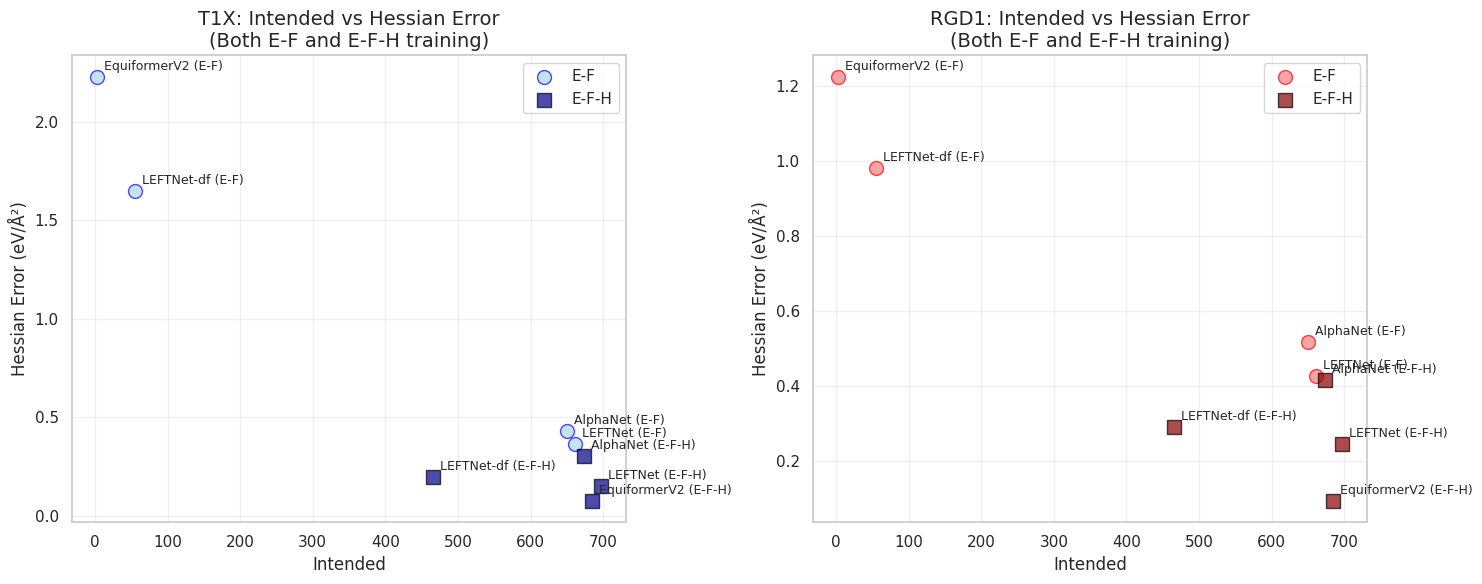


Correlation coefficients (all data):
T1X: -0.946
RGD1: -0.906


In [103]:
# Create scatter plots with separate markers for E-F and E-F-H
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot T1X data
t1x_ef = merged_t1x[merged_t1x['Train Type'] == 'E-F']
t1x_efh = merged_t1x[merged_t1x['Train Type'] == 'E-F-H']

ax1.scatter(t1x_ef['Intended'], t1x_ef['Hessian_mean'], 
           s=100, alpha=0.7, c='lightblue', edgecolors='blue', marker='o', label='E-F')
ax1.scatter(t1x_efh['Intended'], t1x_efh['Hessian_mean'], 
           s=100, alpha=0.7, c='darkblue', edgecolors='black', marker='s', label='E-F-H')

# Annotate T1X points
for i, row in merged_t1x.iterrows():
    ax1.annotate(f"{row['Model_clean']} ({row['Train Type']})", 
                (row['Intended'], row['Hessian_mean']),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

ax1.set_xlabel('Intended', fontsize=12)
ax1.set_ylabel('Hessian Error (eV/Å²)', fontsize=12)
ax1.set_title('T1X: Intended vs Hessian Error\n(Both E-F and E-F-H training)', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot RGD1 data
rgd1_ef = merged_rgd1[merged_rgd1['Train Type'] == 'E-F']
rgd1_efh = merged_rgd1[merged_rgd1['Train Type'] == 'E-F-H']

ax2.scatter(rgd1_ef['Intended'], rgd1_ef['Hessian_mean'], 
           s=100, alpha=0.7, c='lightcoral', edgecolors='red', marker='o', label='E-F')
ax2.scatter(rgd1_efh['Intended'], rgd1_efh['Hessian_mean'], 
           s=100, alpha=0.7, c='darkred', edgecolors='black', marker='s', label='E-F-H')

# Annotate RGD1 points
for i, row in merged_rgd1.iterrows():
    ax2.annotate(f"{row['Model_clean']} ({row['Train Type']})", 
                (row['Intended'], row['Hessian_mean']),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

ax2.set_xlabel('Intended', fontsize=12)
ax2.set_ylabel('Hessian Error (eV/Å²)', fontsize=12)
ax2.set_title('RGD1: Intended vs Hessian Error\n(Both E-F and E-F-H training)', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print correlation coefficients
corr_t1x_intended_hess = np.corrcoef(merged_t1x['Intended'], merged_t1x['Hessian_mean'])[0,1]
corr_rgd1_intended_hess = np.corrcoef(merged_rgd1['Intended'], merged_rgd1['Hessian_mean'])[0,1]

print(f"\nCorrelation coefficients (all data):")
print(f"T1X: {corr_t1x_intended_hess:.3f}")
print(f"RGD1: {corr_rgd1_intended_hess:.3f}")


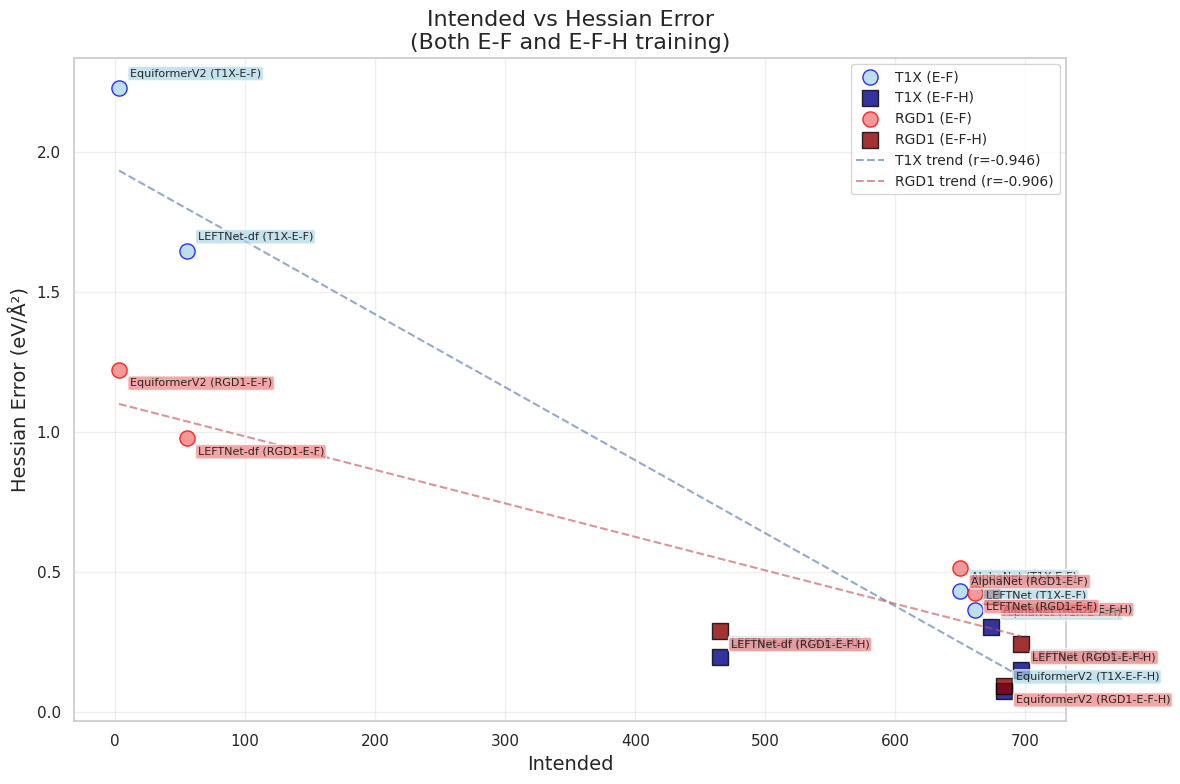

In [104]:
# Create a combined plot for hessian errors, distinguishing E-F and E-F-H
plt.figure(figsize=(12, 8))

# Plot T1X hessian data with different markers for E-F and E-F-H
t1x_ef = merged_t1x[merged_t1x['Train Type'] == 'E-F']
t1x_efh = merged_t1x[merged_t1x['Train Type'] == 'E-F-H']

plt.scatter(t1x_ef['Intended'], t1x_ef['Hessian_mean'], 
           s=120, alpha=0.8, c='lightblue', edgecolors='blue', marker='o', label='T1X (E-F)')
plt.scatter(t1x_efh['Intended'], t1x_efh['Hessian_mean'], 
           s=120, alpha=0.8, c='darkblue', edgecolors='black', marker='s', label='T1X (E-F-H)')

# Plot RGD1 hessian data with different markers for E-F and E-F-H
rgd1_ef = merged_rgd1[merged_rgd1['Train Type'] == 'E-F']
rgd1_efh = merged_rgd1[merged_rgd1['Train Type'] == 'E-F-H']

plt.scatter(rgd1_ef['Intended'], rgd1_ef['Hessian_mean'], 
           s=120, alpha=0.8, c='lightcoral', edgecolors='red', marker='o', label='RGD1 (E-F)')
plt.scatter(rgd1_efh['Intended'], rgd1_efh['Hessian_mean'], 
           s=120, alpha=0.8, c='darkred', edgecolors='black', marker='s', label='RGD1 (E-F-H)')

# Add model labels
for i, row in merged_t1x.iterrows():
    plt.annotate(f"{row['Model_clean']} (T1X-{row['Train Type']})", 
                (row['Intended'], row['Hessian_mean']),
                xytext=(8, 8), textcoords='offset points', fontsize=8, 
                bbox=dict(boxstyle='round,pad=0.2', facecolor='lightblue', alpha=0.7))

for i, row in merged_rgd1.iterrows():
    plt.annotate(f"{row['Model_clean']} (RGD1-{row['Train Type']})", 
                (row['Intended'], row['Hessian_mean']),
                xytext=(8, -12), textcoords='offset points', fontsize=8,
                bbox=dict(boxstyle='round,pad=0.2', facecolor='lightcoral', alpha=0.7))

plt.xlabel('Intended', fontsize=14)
plt.ylabel('Hessian Error (eV/Å²)', fontsize=14)
plt.title('Intended vs Hessian Error\n(Both E-F and E-F-H training)', fontsize=16)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Add trend lines
if len(merged_t1x) > 1:
    slope_t1x, intercept_t1x, r_t1x, p_t1x, se_t1x = stats.linregress(merged_t1x['Intended'], merged_t1x['Hessian_mean'])
    x_trend = np.linspace(merged_t1x['Intended'].min(), merged_t1x['Intended'].max(), 100)
    plt.plot(x_trend, slope_t1x * x_trend + intercept_t1x, 'b--', alpha=0.6, label=f'T1X trend (r={r_t1x:.3f})')

if len(merged_rgd1) > 1:
    slope_rgd1, intercept_rgd1, r_rgd1, p_rgd1, se_rgd1 = stats.linregress(merged_rgd1['Intended'], merged_rgd1['Hessian_mean'])
    x_trend = np.linspace(merged_rgd1['Intended'].min(), merged_rgd1['Intended'].max(), 100)
    plt.plot(x_trend, slope_rgd1 * x_trend + intercept_rgd1, 'r--', alpha=0.6, label=f'RGD1 trend (r={r_rgd1:.3f})')

plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


## Eigenvalue vs Intended

In [105]:
# Extract eigenvalue error values for both datasets
df_t1x['Eigenvalues_mean'] = df_t1x['Eigenvalues (eV/Å²)'].apply(extract_mean)
df_rgd1['Eigenvalues_mean'] = df_rgd1['Eigenvalues (eV/Å²)'].apply(extract_mean)

# Merge datasets for eigenvalue plotting - include both E-F and E-F-H
merged_t1x_eigen = pd.merge(df_t1x[['Model_clean', 'Train Type', 'Eigenvalues_mean']], 
                           gsm_df[['Model_clean', 'Train Type', 'Intended']], 
                           on=['Model_clean', 'Train Type'], how='inner')

merged_rgd1_eigen = pd.merge(df_rgd1[['Model_clean', 'Train Type', 'Eigenvalues_mean']], 
                            gsm_df[['Model_clean', 'Train Type', 'Intended']], 
                            on=['Model_clean', 'Train Type'], how='inner')

print("Eigenvalue data for plotting (both E-F and E-F-H):")
print("T1X:")
print(merged_t1x_eigen)
print("\nRGD1:")
print(merged_rgd1_eigen)


Eigenvalue data for plotting (both E-F and E-F-H):
T1X:
    Model_clean Train Type  Eigenvalues_mean  Intended
0      AlphaNet        E-F             0.038       650
1      AlphaNet      E-F-H             0.024       674
2       LEFTNet        E-F             0.032       661
3       LEFTNet      E-F-H             0.007       697
4    LEFTNet-df        E-F             0.128        55
5    LEFTNet-df      E-F-H             0.007       465
6  EquiformerV2        E-F             0.214         3
7  EquiformerV2      E-F-H             0.003       684

RGD1:
    Model_clean Train Type  Eigenvalues_mean  Intended
0      AlphaNet        E-F             0.053       650
1      AlphaNet      E-F-H             0.040       674
2       LEFTNet        E-F             0.042       661
3       LEFTNet      E-F-H             0.015       697
4    LEFTNet-df        E-F             0.050        55
5    LEFTNet-df      E-F-H             0.013       465
6  EquiformerV2        E-F             0.106         3
7 

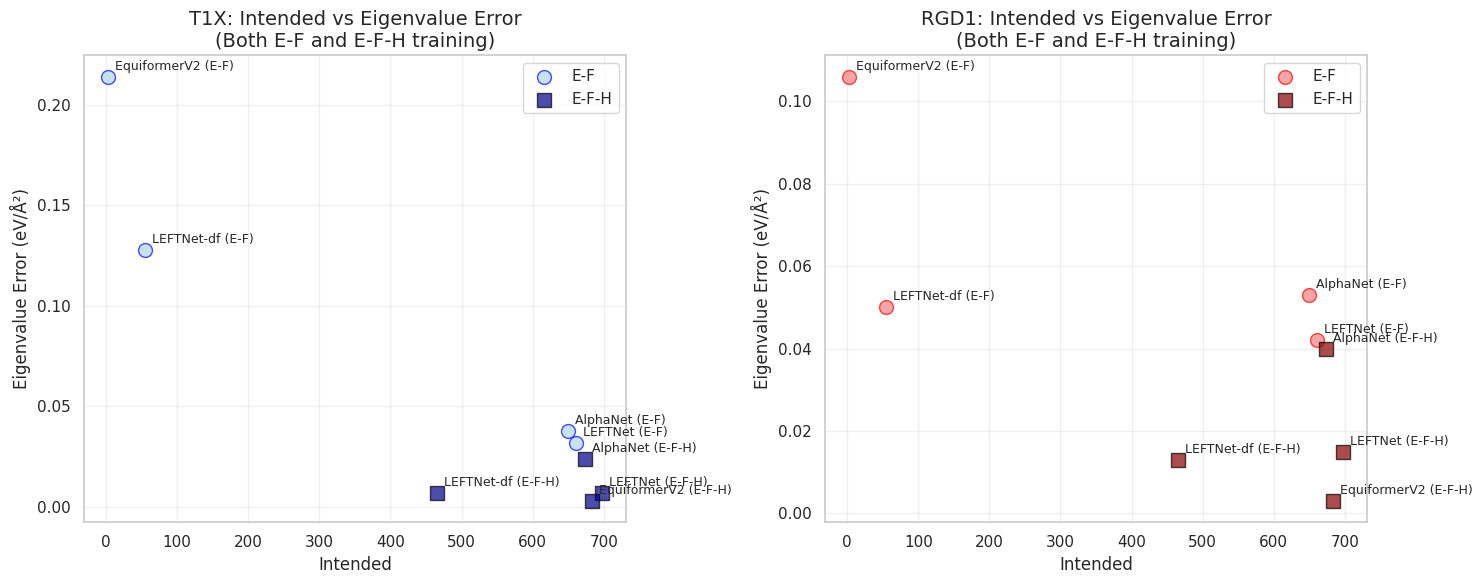


Correlation coefficients for Eigenvalue errors (all data):
T1X: -0.912
RGD1: -0.691


In [106]:
# Create scatter plots for eigenvalue errors with separate markers for E-F and E-F-H
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot T1X eigenvalue data
t1x_ef_eigen = merged_t1x_eigen[merged_t1x_eigen['Train Type'] == 'E-F']
t1x_efh_eigen = merged_t1x_eigen[merged_t1x_eigen['Train Type'] == 'E-F-H']

ax1.scatter(t1x_ef_eigen['Intended'], t1x_ef_eigen['Eigenvalues_mean'], 
           s=100, alpha=0.7, c='lightblue', edgecolors='blue', marker='o', label='E-F')
ax1.scatter(t1x_efh_eigen['Intended'], t1x_efh_eigen['Eigenvalues_mean'], 
           s=100, alpha=0.7, c='darkblue', edgecolors='black', marker='s', label='E-F-H')

# Annotate T1X eigenvalue points
for i, row in merged_t1x_eigen.iterrows():
    ax1.annotate(f"{row['Model_clean']} ({row['Train Type']})", 
                (row['Intended'], row['Eigenvalues_mean']),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

ax1.set_xlabel('Intended', fontsize=12)
ax1.set_ylabel('Eigenvalue Error (eV/Å²)', fontsize=12)
ax1.set_title('T1X: Intended vs Eigenvalue Error\n(Both E-F and E-F-H training)', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot RGD1 eigenvalue data
rgd1_ef_eigen = merged_rgd1_eigen[merged_rgd1_eigen['Train Type'] == 'E-F']
rgd1_efh_eigen = merged_rgd1_eigen[merged_rgd1_eigen['Train Type'] == 'E-F-H']

ax2.scatter(rgd1_ef_eigen['Intended'], rgd1_ef_eigen['Eigenvalues_mean'], 
           s=100, alpha=0.7, c='lightcoral', edgecolors='red', marker='o', label='E-F')
ax2.scatter(rgd1_efh_eigen['Intended'], rgd1_efh_eigen['Eigenvalues_mean'], 
           s=100, alpha=0.7, c='darkred', edgecolors='black', marker='s', label='E-F-H')

# Annotate RGD1 eigenvalue points
for i, row in merged_rgd1_eigen.iterrows():
    ax2.annotate(f"{row['Model_clean']} ({row['Train Type']})", 
                (row['Intended'], row['Eigenvalues_mean']),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

ax2.set_xlabel('Intended', fontsize=12)
ax2.set_ylabel('Eigenvalue Error (eV/Å²)', fontsize=12)
ax2.set_title('RGD1: Intended vs Eigenvalue Error\n(Both E-F and E-F-H training)', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print correlation coefficients for eigenvalues
corr_t1x_intended_eigen = np.corrcoef(merged_t1x_eigen['Intended'], merged_t1x_eigen['Eigenvalues_mean'])[0,1]
corr_rgd1_intended_eigen = np.corrcoef(merged_rgd1_eigen['Intended'], merged_rgd1_eigen['Eigenvalues_mean'])[0,1]

print(f"\nCorrelation coefficients for Eigenvalue errors (all data):")
print(f"T1X: {corr_t1x_intended_eigen:.3f}")
print(f"RGD1: {corr_rgd1_intended_eigen:.3f}")


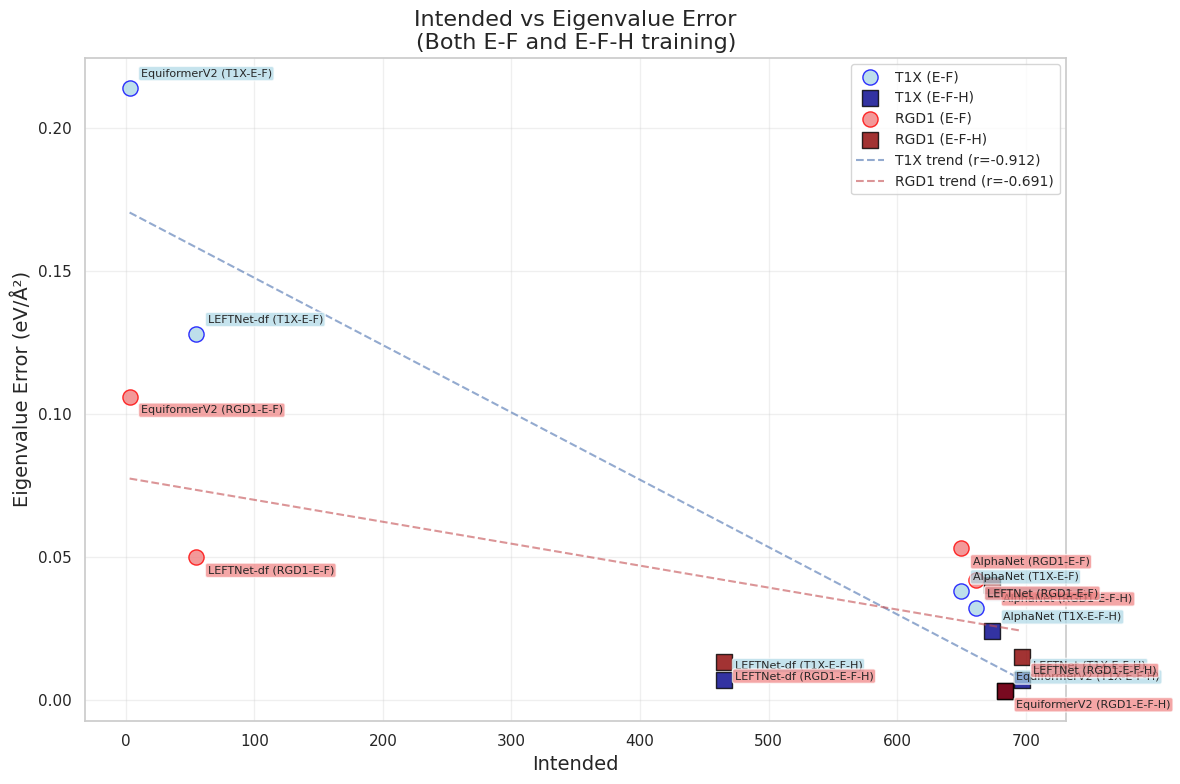

In [107]:
# Create a combined plot for eigenvalue errors, distinguishing E-F and E-F-H
from scipy import stats
plt.figure(figsize=(12, 8))

# Plot T1X eigenvalue data with different markers for E-F and E-F-H
t1x_ef_eigen = merged_t1x_eigen[merged_t1x_eigen['Train Type'] == 'E-F']
t1x_efh_eigen = merged_t1x_eigen[merged_t1x_eigen['Train Type'] == 'E-F-H']

plt.scatter(t1x_ef_eigen['Intended'], t1x_ef_eigen['Eigenvalues_mean'], 
           s=120, alpha=0.8, c='lightblue', edgecolors='blue', marker='o', label='T1X (E-F)')
plt.scatter(t1x_efh_eigen['Intended'], t1x_efh_eigen['Eigenvalues_mean'], 
           s=120, alpha=0.8, c='darkblue', edgecolors='black', marker='s', label='T1X (E-F-H)')

# Plot RGD1 eigenvalue data with different markers for E-F and E-F-H
rgd1_ef_eigen = merged_rgd1_eigen[merged_rgd1_eigen['Train Type'] == 'E-F']
rgd1_efh_eigen = merged_rgd1_eigen[merged_rgd1_eigen['Train Type'] == 'E-F-H']

plt.scatter(rgd1_ef_eigen['Intended'], rgd1_ef_eigen['Eigenvalues_mean'], 
           s=120, alpha=0.8, c='lightcoral', edgecolors='red', marker='o', label='RGD1 (E-F)')
plt.scatter(rgd1_efh_eigen['Intended'], rgd1_efh_eigen['Eigenvalues_mean'], 
           s=120, alpha=0.8, c='darkred', edgecolors='black', marker='s', label='RGD1 (E-F-H)')

# Add model labels
for i, row in merged_t1x_eigen.iterrows():
    plt.annotate(f"{row['Model_clean']} (T1X-{row['Train Type']})", 
                (row['Intended'], row['Eigenvalues_mean']),
                xytext=(8, 8), textcoords='offset points', fontsize=8, 
                bbox=dict(boxstyle='round,pad=0.2', facecolor='lightblue', alpha=0.7))

for i, row in merged_rgd1_eigen.iterrows():
    plt.annotate(f"{row['Model_clean']} (RGD1-{row['Train Type']})", 
                (row['Intended'], row['Eigenvalues_mean']),
                xytext=(8, -12), textcoords='offset points', fontsize=8,
                bbox=dict(boxstyle='round,pad=0.2', facecolor='lightcoral', alpha=0.7))

plt.xlabel('Intended', fontsize=14)
plt.ylabel('Eigenvalue Error (eV/Å²)', fontsize=14)
plt.title('Intended vs Eigenvalue Error\n(Both E-F and E-F-H training)', fontsize=16)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Add trend lines for eigenvalues
if len(merged_t1x_eigen) > 1:
    slope_t1x_eigen, intercept_t1x_eigen, r_t1x_eigen, p_t1x_eigen, se_t1x_eigen = stats.linregress(merged_t1x_eigen['Intended'], merged_t1x_eigen['Eigenvalues_mean'])
    x_trend = np.linspace(merged_t1x_eigen['Intended'].min(), merged_t1x_eigen['Intended'].max(), 100)
    plt.plot(x_trend, slope_t1x_eigen * x_trend + intercept_t1x_eigen, 'b--', alpha=0.6, label=f'T1X trend (r={r_t1x_eigen:.3f})')

if len(merged_rgd1_eigen) > 1:
    slope_rgd1_eigen, intercept_rgd1_eigen, r_rgd1_eigen, p_rgd1_eigen, se_rgd1_eigen = stats.linregress(merged_rgd1_eigen['Intended'], merged_rgd1_eigen['Eigenvalues_mean'])
    x_trend = np.linspace(merged_rgd1_eigen['Intended'].min(), merged_rgd1_eigen['Intended'].max(), 100)
    plt.plot(x_trend, slope_rgd1_eigen * x_trend + intercept_rgd1_eigen, 'r--', alpha=0.6, label=f'RGD1 trend (r={r_rgd1_eigen:.3f})')

plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


## Force Error vs GSM Success

In [108]:
# Extract force error values for both datasets
df_t1x['Force_mean'] = df_t1x['Force (eV/Å)'].apply(extract_mean)
df_rgd1['Force_mean'] = df_rgd1['Force (eV/Å)'].apply(extract_mean)

# Merge datasets for force error plotting - include both E-F and E-F-H
merged_t1x_force = pd.merge(df_t1x[['Model_clean', 'Train Type', 'Force_mean']], 
                           gsm_df[['Model_clean', 'Train Type', 'GSM Success']], 
                           on=['Model_clean', 'Train Type'], how='inner')

merged_rgd1_force = pd.merge(df_rgd1[['Model_clean', 'Train Type', 'Force_mean']], 
                            gsm_df[['Model_clean', 'Train Type', 'GSM Success']], 
                            on=['Model_clean', 'Train Type'], how='inner')

print("Force Error vs GSM Success data:")
print("T1X:")
print(merged_t1x_force)
print("\nRGD1:")
print(merged_rgd1_force)


Force Error vs GSM Success data:
T1X:
    Model_clean Train Type  Force_mean  GSM Success
0      AlphaNet        E-F       0.040          828
1      AlphaNet      E-F-H       0.040          865
2       LEFTNet        E-F       0.037          852
3       LEFTNet      E-F-H       0.036          870
4    LEFTNet-df        E-F       0.029          895
5    LEFTNet-df      E-F-H       0.044          891
6  EquiformerV2        E-F       0.021          888
7  EquiformerV2      E-F-H       0.016          869

RGD1:
    Model_clean Train Type  Force_mean  GSM Success
0      AlphaNet        E-F       0.151          828
1      AlphaNet      E-F-H       0.148          865
2       LEFTNet        E-F       0.132          852
3       LEFTNet      E-F-H       0.130          870
4    LEFTNet-df        E-F       0.146          895
5    LEFTNet-df      E-F-H       0.142          891
6  EquiformerV2        E-F       0.111          888
7  EquiformerV2      E-F-H       0.056          869


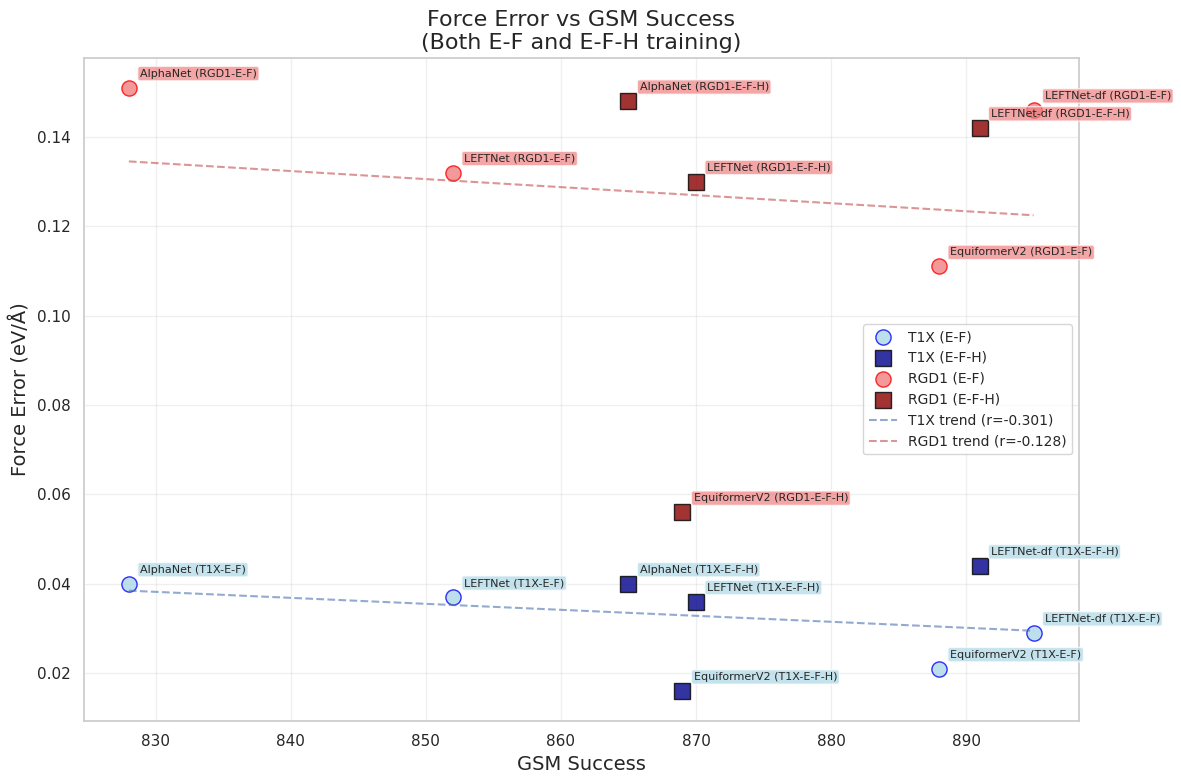


Correlation coefficients for Force Error vs GSM Success:
T1X: -0.301
RGD1: -0.128


In [109]:
# Create a combined plot for force error vs GSM success
plt.figure(figsize=(12, 8))

# Plot T1X force data with different markers for E-F and E-F-H
t1x_ef_force = merged_t1x_force[merged_t1x_force['Train Type'] == 'E-F']
t1x_efh_force = merged_t1x_force[merged_t1x_force['Train Type'] == 'E-F-H']

plt.scatter(t1x_ef_force['GSM Success'], t1x_ef_force['Force_mean'], 
           s=120, alpha=0.8, c='lightblue', edgecolors='blue', marker='o', label='T1X (E-F)')
plt.scatter(t1x_efh_force['GSM Success'], t1x_efh_force['Force_mean'], 
           s=120, alpha=0.8, c='darkblue', edgecolors='black', marker='s', label='T1X (E-F-H)')

# Plot RGD1 force data with different markers for E-F and E-F-H
rgd1_ef_force = merged_rgd1_force[merged_rgd1_force['Train Type'] == 'E-F']
rgd1_efh_force = merged_rgd1_force[merged_rgd1_force['Train Type'] == 'E-F-H']

plt.scatter(rgd1_ef_force['GSM Success'], rgd1_ef_force['Force_mean'], 
           s=120, alpha=0.8, c='lightcoral', edgecolors='red', marker='o', label='RGD1 (E-F)')
plt.scatter(rgd1_efh_force['GSM Success'], rgd1_efh_force['Force_mean'], 
           s=120, alpha=0.8, c='darkred', edgecolors='black', marker='s', label='RGD1 (E-F-H)')

# Add model labels
for i, row in merged_t1x_force.iterrows():
    plt.annotate(f"{row['Model_clean']} (T1X-{row['Train Type']})", 
                (row['GSM Success'], row['Force_mean']),
                xytext=(8, 8), textcoords='offset points', fontsize=8, 
                bbox=dict(boxstyle='round,pad=0.2', facecolor='lightblue', alpha=0.7))

for i, row in merged_rgd1_force.iterrows():
    plt.annotate(f"{row['Model_clean']} (RGD1-{row['Train Type']})", 
                (row['GSM Success'], row['Force_mean']),
                xytext=(8, 8), textcoords='offset points', fontsize=8, 
                bbox=dict(boxstyle='round,pad=0.2', facecolor='lightcoral', alpha=0.7))

plt.xlabel('GSM Success', fontsize=14)
plt.ylabel('Force Error (eV/Å)', fontsize=14)
plt.title('Force Error vs GSM Success\n(Both E-F and E-F-H training)', fontsize=16)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Add trend lines for force errors
if len(merged_t1x_force) > 1:
    slope_t1x_force, intercept_t1x_force, r_t1x_force, p_t1x_force, se_t1x_force = stats.linregress(merged_t1x_force['GSM Success'], merged_t1x_force['Force_mean'])
    x_trend = np.linspace(merged_t1x_force['GSM Success'].min(), merged_t1x_force['GSM Success'].max(), 100)
    plt.plot(x_trend, slope_t1x_force * x_trend + intercept_t1x_force, 'b--', alpha=0.6, label=f'T1X trend (r={r_t1x_force:.3f})')

if len(merged_rgd1_force) > 1:
    slope_rgd1_force, intercept_rgd1_force, r_rgd1_force, p_rgd1_force, se_rgd1_force = stats.linregress(merged_rgd1_force['GSM Success'], merged_rgd1_force['Force_mean'])
    x_trend = np.linspace(merged_rgd1_force['GSM Success'].min(), merged_rgd1_force['GSM Success'].max(), 100)
    plt.plot(x_trend, slope_rgd1_force * x_trend + intercept_rgd1_force, 'r--', alpha=0.6, label=f'RGD1 trend (r={r_rgd1_force:.3f})')

plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# Print correlation coefficients for force errors vs GSM success
corr_t1x_gsm_force = np.corrcoef(merged_t1x_force['GSM Success'], merged_t1x_force['Force_mean'])[0,1]
corr_rgd1_gsm_force = np.corrcoef(merged_rgd1_force['GSM Success'], merged_rgd1_force['Force_mean'])[0,1]

print(f"\nCorrelation coefficients for Force Error vs GSM Success:")
print(f"T1X: {corr_t1x_gsm_force:.3f}")
print(f"RGD1: {corr_rgd1_gsm_force:.3f}")


## Energy Error vs GSM Success

In [110]:
# Extract energy error values for both datasets
df_t1x['Energy_mean'] = df_t1x['Energy (eV)'].apply(extract_mean)
df_rgd1['Energy_mean'] = df_rgd1['Energy (eV)'].apply(extract_mean)

# Merge datasets for energy error plotting - include both E-F and E-F-H
merged_t1x_energy = pd.merge(df_t1x[['Model_clean', 'Train Type', 'Energy_mean']], 
                            gsm_df[['Model_clean', 'Train Type', 'GSM Success']], 
                            on=['Model_clean', 'Train Type'], how='inner')

merged_rgd1_energy = pd.merge(df_rgd1[['Model_clean', 'Train Type', 'Energy_mean']], 
                             gsm_df[['Model_clean', 'Train Type', 'GSM Success']], 
                             on=['Model_clean', 'Train Type'], how='inner')

print("Energy Error vs GSM Success data:")
print("T1X:")
print(merged_t1x_energy)
print("\nRGD1:")
print(merged_rgd1_energy)


Energy Error vs GSM Success data:
T1X:
    Model_clean Train Type  Energy_mean  GSM Success
0      AlphaNet        E-F        0.044          828
1      AlphaNet      E-F-H        0.034          865
2       LEFTNet        E-F        0.047          852
3       LEFTNet      E-F-H        0.035          870
4    LEFTNet-df        E-F        0.054          895
5    LEFTNet-df      E-F-H        0.050          891
6  EquiformerV2        E-F        0.045          888
7  EquiformerV2      E-F-H        0.019          869

RGD1:
    Model_clean Train Type  Energy_mean  GSM Success
0      AlphaNet        E-F        0.257          828
1      AlphaNet      E-F-H        0.259          865
2       LEFTNet        E-F        0.242          852
3       LEFTNet      E-F-H        0.226          870
4    LEFTNet-df        E-F        0.322          895
5    LEFTNet-df      E-F-H        0.304          891
6  EquiformerV2        E-F        0.243          888
7  EquiformerV2      E-F-H        0.133          869


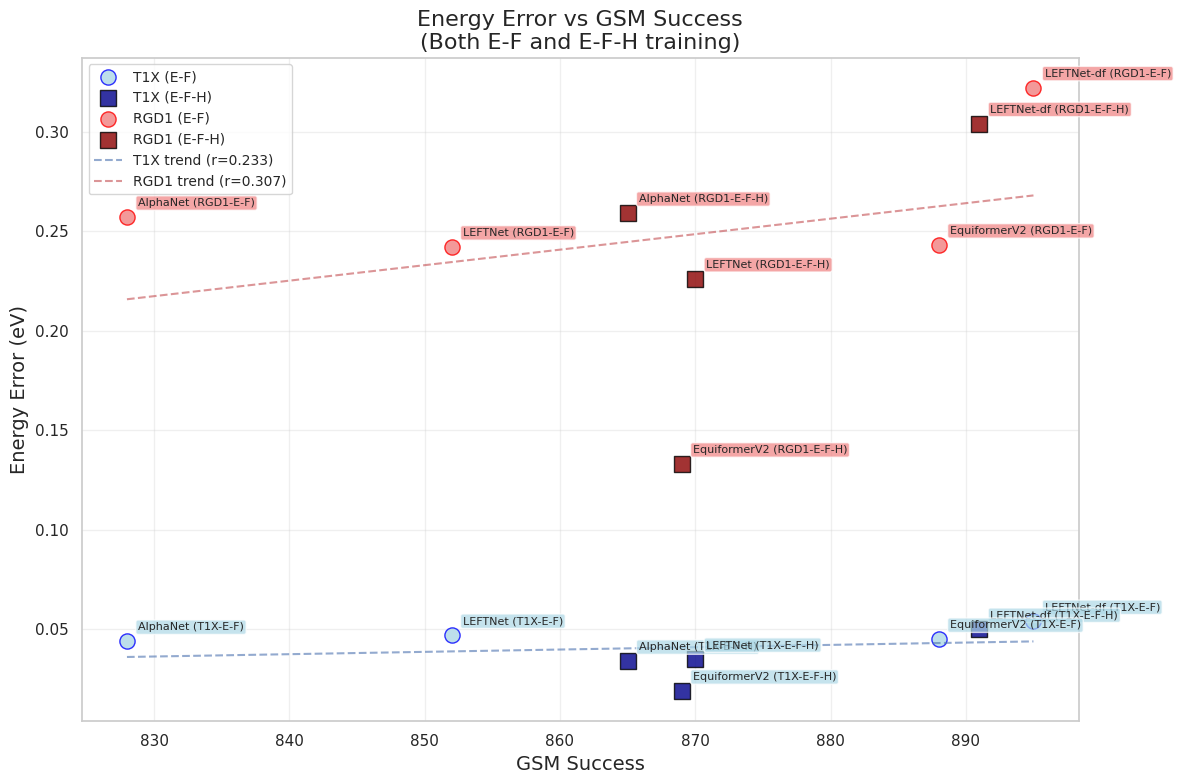


Correlation coefficients for Energy Error vs GSM Success:
T1X: 0.233
RGD1: 0.307


In [111]:
# Create a combined plot for energy error vs GSM success
plt.figure(figsize=(12, 8))

# Plot T1X energy data with different markers for E-F and E-F-H
t1x_ef_energy = merged_t1x_energy[merged_t1x_energy['Train Type'] == 'E-F']
t1x_efh_energy = merged_t1x_energy[merged_t1x_energy['Train Type'] == 'E-F-H']

plt.scatter(t1x_ef_energy['GSM Success'], t1x_ef_energy['Energy_mean'], 
           s=120, alpha=0.8, c='lightblue', edgecolors='blue', marker='o', label='T1X (E-F)')
plt.scatter(t1x_efh_energy['GSM Success'], t1x_efh_energy['Energy_mean'], 
           s=120, alpha=0.8, c='darkblue', edgecolors='black', marker='s', label='T1X (E-F-H)')

# Plot RGD1 energy data with different markers for E-F and E-F-H
rgd1_ef_energy = merged_rgd1_energy[merged_rgd1_energy['Train Type'] == 'E-F']
rgd1_efh_energy = merged_rgd1_energy[merged_rgd1_energy['Train Type'] == 'E-F-H']

plt.scatter(rgd1_ef_energy['GSM Success'], rgd1_ef_energy['Energy_mean'], 
           s=120, alpha=0.8, c='lightcoral', edgecolors='red', marker='o', label='RGD1 (E-F)')
plt.scatter(rgd1_efh_energy['GSM Success'], rgd1_efh_energy['Energy_mean'], 
           s=120, alpha=0.8, c='darkred', edgecolors='black', marker='s', label='RGD1 (E-F-H)')

# Add model labels
for i, row in merged_t1x_energy.iterrows():
    plt.annotate(f"{row['Model_clean']} (T1X-{row['Train Type']})", 
                (row['GSM Success'], row['Energy_mean']),
                xytext=(8, 8), textcoords='offset points', fontsize=8, 
                bbox=dict(boxstyle='round,pad=0.2', facecolor='lightblue', alpha=0.7))

for i, row in merged_rgd1_energy.iterrows():
    plt.annotate(f"{row['Model_clean']} (RGD1-{row['Train Type']})", 
                (row['GSM Success'], row['Energy_mean']),
                xytext=(8, 8), textcoords='offset points', fontsize=8, 
                bbox=dict(boxstyle='round,pad=0.2', facecolor='lightcoral', alpha=0.7))

plt.xlabel('GSM Success', fontsize=14)
plt.ylabel('Energy Error (eV)', fontsize=14)
plt.title('Energy Error vs GSM Success\n(Both E-F and E-F-H training)', fontsize=16)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Add trend lines for energy errors
if len(merged_t1x_energy) > 1:
    slope_t1x_energy, intercept_t1x_energy, r_t1x_energy, p_t1x_energy, se_t1x_energy = stats.linregress(merged_t1x_energy['GSM Success'], merged_t1x_energy['Energy_mean'])
    x_trend = np.linspace(merged_t1x_energy['GSM Success'].min(), merged_t1x_energy['GSM Success'].max(), 100)
    plt.plot(x_trend, slope_t1x_energy * x_trend + intercept_t1x_energy, 'b--', alpha=0.6, label=f'T1X trend (r={r_t1x_energy:.3f})')

if len(merged_rgd1_energy) > 1:
    slope_rgd1_energy, intercept_rgd1_energy, r_rgd1_energy, p_rgd1_energy, se_rgd1_energy = stats.linregress(merged_rgd1_energy['GSM Success'], merged_rgd1_energy['Energy_mean'])
    x_trend = np.linspace(merged_rgd1_energy['GSM Success'].min(), merged_rgd1_energy['GSM Success'].max(), 100)
    plt.plot(x_trend, slope_rgd1_energy * x_trend + intercept_rgd1_energy, 'r--', alpha=0.6, label=f'RGD1 trend (r={r_rgd1_energy:.3f})')

plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# Print correlation coefficients for energy errors vs GSM success
corr_t1x_gsm_energy = np.corrcoef(merged_t1x_energy['GSM Success'], merged_t1x_energy['Energy_mean'])[0,1]
corr_rgd1_gsm_energy = np.corrcoef(merged_rgd1_energy['GSM Success'], merged_rgd1_energy['Energy_mean'])[0,1]

print(f"\nCorrelation coefficients for Energy Error vs GSM Success:")
print(f"T1X: {corr_t1x_gsm_energy:.3f}")
print(f"RGD1: {corr_rgd1_gsm_energy:.3f}")


## Hessian Error vs GSM Success

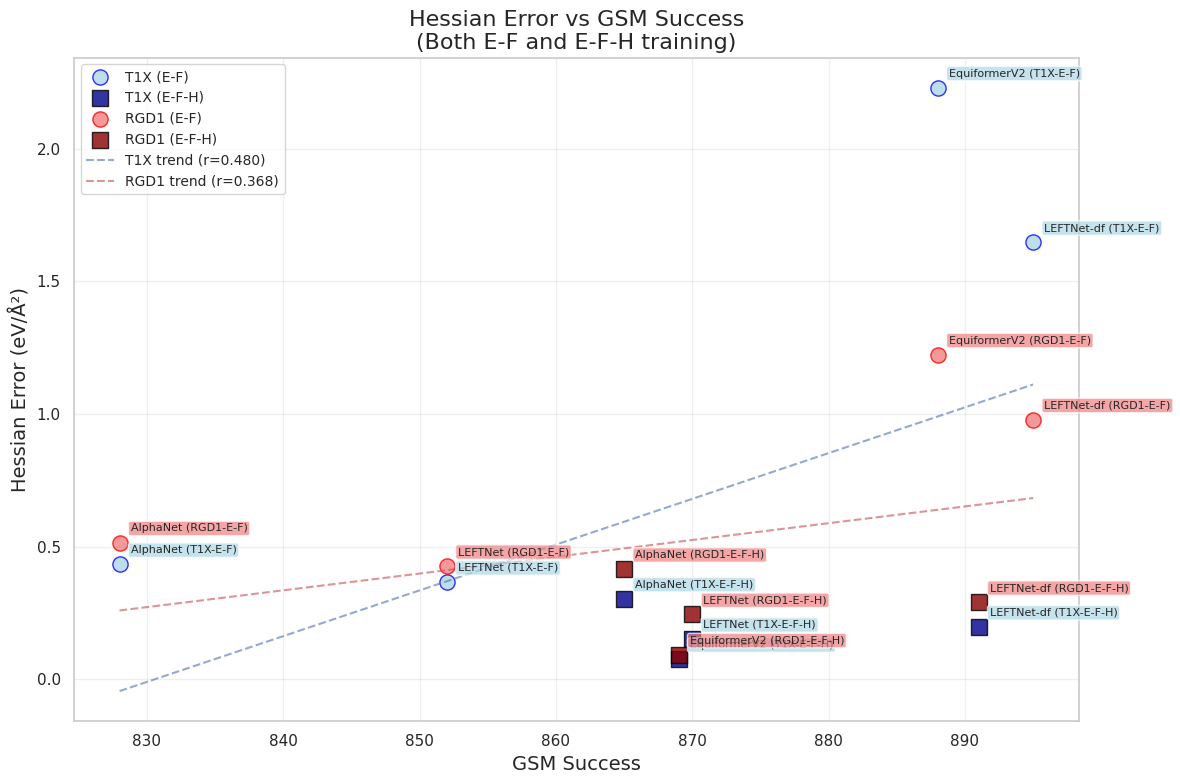


Correlation coefficients for Hessian Error vs GSM Success:
T1X: 0.480
RGD1: 0.368


In [112]:
# Create a combined plot for hessian error vs GSM success
plt.figure(figsize=(12, 8))

# Plot T1X hessian data vs GSM Success with different markers for E-F and E-F-H
t1x_ef_hess = merged_t1x[merged_t1x['Train Type'] == 'E-F']
t1x_efh_hess = merged_t1x[merged_t1x['Train Type'] == 'E-F-H']

plt.scatter(t1x_ef_hess['GSM Success'], t1x_ef_hess['Hessian_mean'], 
           s=120, alpha=0.8, c='lightblue', edgecolors='blue', marker='o', label='T1X (E-F)')
plt.scatter(t1x_efh_hess['GSM Success'], t1x_efh_hess['Hessian_mean'], 
           s=120, alpha=0.8, c='darkblue', edgecolors='black', marker='s', label='T1X (E-F-H)')

# Plot RGD1 hessian data vs GSM Success with different markers for E-F and E-F-H
rgd1_ef_hess = merged_rgd1[merged_rgd1['Train Type'] == 'E-F']
rgd1_efh_hess = merged_rgd1[merged_rgd1['Train Type'] == 'E-F-H']

plt.scatter(rgd1_ef_hess['GSM Success'], rgd1_ef_hess['Hessian_mean'], 
           s=120, alpha=0.8, c='lightcoral', edgecolors='red', marker='o', label='RGD1 (E-F)')
plt.scatter(rgd1_efh_hess['GSM Success'], rgd1_efh_hess['Hessian_mean'], 
           s=120, alpha=0.8, c='darkred', edgecolors='black', marker='s', label='RGD1 (E-F-H)')

# Add model labels
for i, row in merged_t1x.iterrows():
    plt.annotate(f"{row['Model_clean']} (T1X-{row['Train Type']})", 
                (row['GSM Success'], row['Hessian_mean']),
                xytext=(8, 8), textcoords='offset points', fontsize=8, 
                bbox=dict(boxstyle='round,pad=0.2', facecolor='lightblue', alpha=0.7))

for i, row in merged_rgd1.iterrows():
    plt.annotate(f"{row['Model_clean']} (RGD1-{row['Train Type']})", 
                (row['GSM Success'], row['Hessian_mean']),
                xytext=(8, 8), textcoords='offset points', fontsize=8, 
                bbox=dict(boxstyle='round,pad=0.2', facecolor='lightcoral', alpha=0.7))

plt.xlabel('GSM Success', fontsize=14)
plt.ylabel('Hessian Error (eV/Å²)', fontsize=14)
plt.title('Hessian Error vs GSM Success\n(Both E-F and E-F-H training)', fontsize=16)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Add trend lines for hessian errors vs GSM success
if len(merged_t1x) > 1:
    slope_t1x_gsm, intercept_t1x_gsm, r_t1x_gsm, p_t1x_gsm, se_t1x_gsm = stats.linregress(merged_t1x['GSM Success'], merged_t1x['Hessian_mean'])
    x_trend = np.linspace(merged_t1x['GSM Success'].min(), merged_t1x['GSM Success'].max(), 100)
    plt.plot(x_trend, slope_t1x_gsm * x_trend + intercept_t1x_gsm, 'b--', alpha=0.6, label=f'T1X trend (r={r_t1x_gsm:.3f})')

if len(merged_rgd1) > 1:
    slope_rgd1_gsm, intercept_rgd1_gsm, r_rgd1_gsm, p_rgd1_gsm, se_rgd1_gsm = stats.linregress(merged_rgd1['GSM Success'], merged_rgd1['Hessian_mean'])
    x_trend = np.linspace(merged_rgd1['GSM Success'].min(), merged_rgd1['GSM Success'].max(), 100)
    plt.plot(x_trend, slope_rgd1_gsm * x_trend + intercept_rgd1_gsm, 'r--', alpha=0.6, label=f'RGD1 trend (r={r_rgd1_gsm:.3f})')

plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# Print correlation coefficients for hessian errors vs GSM success
corr_t1x_gsm_hess = np.corrcoef(merged_t1x['GSM Success'], merged_t1x['Hessian_mean'])[0,1]
corr_rgd1_gsm_hess = np.corrcoef(merged_rgd1['GSM Success'], merged_rgd1['Hessian_mean'])[0,1]

print(f"\nCorrelation coefficients for Hessian Error vs GSM Success:")
print(f"T1X: {corr_t1x_gsm_hess:.3f}")
print(f"RGD1: {corr_rgd1_gsm_hess:.3f}")



## Summary: All Correlations

In [ ]:


def print_corr(_c):
    if abs(_c) > 0.9:
        return "very strong"
    elif abs(_c) > 0.7:
        return "strong"
    elif abs(_c) > 0.5:
        return "moderate"
    elif abs(_c) > 0.3:
        return "weak"
    else:
        return "very weak"

print("\n1. HESSIAN ERROR vs INTENDED:")
print(f"   T1X dataset:  r = {corr_t1x_intended_hess:.3f} ({print_corr(corr_t1x_intended_hess)})")
print(f"   RGD1 dataset: r = {corr_rgd1_intended_hess:.3f} ({print_corr(corr_rgd1_intended_hess)})")

print("\n2. EIGENVALUE ERROR vs INTENDED:")
print(f"   T1X dataset:  r = {corr_t1x_intended_eigen:.3f} ({print_corr(corr_t1x_intended_eigen)})")
print(f"   RGD1 dataset: r = {corr_rgd1_intended_eigen:.3f} ({print_corr(corr_rgd1_intended_eigen)})")

print("\n3. FORCE ERROR vs GSM SUCCESS:")
print(f"   T1X dataset:  r = {corr_t1x_gsm_force:.3f} ({print_corr(corr_t1x_gsm_force)})")
print(f"   RGD1 dataset: r = {corr_rgd1_gsm_force:.3f} ({print_corr(corr_rgd1_gsm_force)})")

print("\n4. ENERGY ERROR vs GSM SUCCESS:")
print(f"   T1X dataset:  r = {corr_t1x_gsm_energy:.3f} ({print_corr(corr_t1x_gsm_energy)})")
print(f"   RGD1 dataset: r = {corr_rgd1_gsm_energy:.3f} ({print_corr(corr_rgd1_gsm_energy)})")

print("\n5. HESSIAN ERROR vs GSM SUCCESS:")
print(f"   T1X dataset:  r = {corr_t1x_gsm_hess:.3f} ({print_corr(corr_t1x_gsm_hess)})")
print(f"   RGD1 dataset: r = {corr_rgd1_gsm_hess:.3f} ({print_corr(corr_rgd1_gsm_hess)})")





COMPREHENSIVE CORRELATION ANALYSIS SUMMARY

1. HESSIAN ERROR vs INTENDED:
   T1X dataset:  r = -0.946 (very strong)
   RGD1 dataset: r = -0.906 (very strong)

2. EIGENVALUE ERROR vs INTENDED:
   T1X dataset:  r = -0.912 (very strong)
   RGD1 dataset: r = -0.691 (moderate)

3. FORCE ERROR vs GSM SUCCESS:
   T1X dataset:  r = -0.301 (weak)
   RGD1 dataset: r = -0.128 (very weak)

4. ENERGY ERROR vs GSM SUCCESS:
   T1X dataset:  r = 0.233 (very weak)
   RGD1 dataset: r = 0.307 (weak)

5. HESSIAN ERROR vs GSM SUCCESS:
   T1X dataset:  r = 0.480 (weak)
   RGD1 dataset: r = 0.368 (weak)
